# Exploratory Data Analysis Phenotypic Data

This notebook investigates the contents of the phenotypic data from all sites from the ADHD-200 Competition set. 

# Imports

Access all of the packages and files that are important for running this notebook. 
This includes packages, a function, and the phenotypic file for all sites.

## Packages

Since this is only a exploratory data analysis, there aren't very many imports

- `os` for opening files

- `pandas` for dataframes

- `numpy` for arrays

- `matplotlib.pyplot` for plotting

- `seaborn` for customizing plots

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## File

Import the file to perform exploratory data analysis on. 
This file is located in another folder, so it will need to be accessed from the root folder for this project. 

### get_base_filepath()

Access the filepath for th ebase folder of the project. 
From here, any other asset of the project can be located.

In [2]:
def get_base_filepath():
    '''
    Access the filepath for the base folder of the project
    
    Input: None
    
    Output: The filepath to the root of the folder
    '''
    # Get current directory
    os.path.abspath(os.curdir)

    # Go up a directory level
    os.chdir('..')

    # Set baseline filepath to the project folder directory
    base_folder_filepath = os.path.abspath(os.curdir)
    return base_folder_filepath

### Access file

Update the filepath to include the file's location and open it as a dataframe. 
The index is the column 'ID' which is the subject ID that the row contains information about.

In [3]:
# The folder for the project
base_folder_filepath = get_base_filepath()

# Phenotypic data site folder
filepath = base_folder_filepath + '\\Data\\Phenotypic\\allSubs_testSet_phenotypic_dx.csv'

# Dataframe from filepath
df_pheno = pd.read_csv(filepath, index_col='ID')

# Exploratory Data Analysis

Look at the dataframe and draw conclusions from the insights.

View basic properties of the unchanged dataframe.

In [ ]:
df_pheno.shape

This dataframe includes 197 subjects each with 23 features.

In [ ]:
df_pheno.head()

List the 23 columns

In [ ]:
df_pheno.columns

## Filter Dataframe

Not all columns will be useful for making predictions. 

### Unnecessary

These are the features that are least likely to be useful when training a machine learning model. 
A diagnosis should not depend on the quality of the scan.

In [4]:
drop_features = ['Disclaimer',
                 'QC_Rest_1', 'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4', 
                 'QC_Anatomical_1', 'QC_Anatomical_2']

df_pheno_filtered = df_pheno.copy()
df_pheno_filtered = df_pheno.drop(drop_features, axis=1)

In [ ]:
df_pheno_filtered.head()

With this change, the number of columns has been reduced to 16. 
This will also make it easier when training since the model has less features to look at.

In [ ]:
df_pheno_filtered.shape

### Holdout

Some of the data was used as a holdout for testing during the competition. 
This data is from the Brown site (Site 2) and has 'pending' for all data directly related to the diagnosis.

In [5]:
df_brown = df_pheno_filtered.loc[df_pheno_filtered['Site'] == 2]
df_pheno_filtered = df_pheno_filtered.drop(df_pheno_filtered.loc[df_pheno_filtered['Site'] == 2].index)
df_brown

,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ
ID,,,,,,,,,,,,,,,,
26001,2,1,16.92,1.0,pending,pending,pending,pending,pending,pending,pending,NaN,133.0,104.0,NaN,120.0
26002,2,1,15.68,1.0,pending,pending,pending,pending,pending,pending,pending,NaN,106.0,106.0,NaN,107.0
26004,2,0,14.99,1.0,pending,pending,pending,pending,pending,pending,pending,NaN,119.0,123.0,NaN,125.0
26005,2,0,15.16,1.0,pending,pending,pending,pending,pending,pending,pending,NaN,116.0,131.0,NaN,126.0
26009,2,1,16.91,0.0,pending,pending,pending,pending,pending,pending,pending,NaN,113.0,81.0,NaN,97.0
26014,2,0,16.21,1.0,pending,pending,pending,pending,pending,pending,pending,NaN,101.0,102.0,NaN,102.0
26015,2,0,15.20,1.0,pending,pending,pending,pending,pending,pending,pending,NaN,127.0,98.0,NaN,113.0
26016,2,1,16.07,1.0,pending,pending,pending,pending,pending,pending,pending,NaN,120.0,96.0,NaN,109.0
26017,2,0,14.56,1.0,pending,pending,pending,pending,pending,pending,pending,NaN,95.0,87.0,NaN,89.0


There are 26 subjects at the Brown site.

In [ ]:
df_brown.shape

When the Brown subjects are removed from the dataframe, there are 171 subjects remaining.

In [ ]:
df_pheno_filtered.shape

### Targets

These columns directly relate to the diagnosis. 
In the Brown site, these columns are withheld and replaced with 'pending'

In [6]:
targets_features = ['DX', 'Secondary Dx ', 
                    'ADHD Measure', 'ADHD Index', 'Inattentive', 
                    'Hyper/Impulsive', 'Med Status']

df_targets = df_pheno_filtered[targets_features]
df_brown_targets = df_brown[targets_features]
df_pheno_filtered = df_pheno_filtered.drop(targets_features, axis=1)

In [ ]:
df_targets.head()

In [ ]:
df_pheno_filtered.head()

## Null values

Look at every column and find the null values or imputed null values (-999)

### Main Dataframe

Focuses on the main dataframe.

In [7]:
df_pheno_filtered.loc[df_pheno_filtered['Handedness'] > 0, 'Handedness'] = 1
df_pheno_filtered.loc[df_pheno_filtered['Handedness'] < 0, 'Handedness'] = 0

ID
1038415    1.0
1201251    1.0
1245758    1.0
1253411    1.0
1419103    1.0
          ... 
25008      1.0
25009      1.0
25012      1.0
25013      1.0
25014      1.0
Name: Handedness, Length: 171, dtype: float64

In [8]:
null_values = dict()
numeric_cols = ['Gender', 'Age', 'IQ Measure', 'Handedness',
                'Verbal IQ', 'Performance IQ', 'Full2 IQ', 'Full4 IQ']

for col in numeric_cols:
    null_values[col] = (df_pheno_filtered[col].isnull().sum(), df_pheno_filtered[col].min())

df_null_values = pd.DataFrame(data=null_values, index=['Null_count', 'Min_value'])
df_null_values.head()

,Gender,Age,IQ Measure,Handedness,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ
Null_count,0,0.00,0.0,2.0,60.0,60.0,96.0,27.0
Min_value,0,7.26,1.0,0.0,80.0,67.0,-999.0,77.0


The 60 points where Perforamnce IQ is null are the same 60 points where Verbal IQ is null.

In [9]:
df_pheno_filtered[df_pheno_filtered['Performance IQ'].isnull()]

,Site,Gender,Age,Handedness,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ
ID,,,,,,,,,
27000,4,0,20.90,1.0,5.0,NaN,NaN,91.0,NaN
27003,4,1,17.54,0.0,5.0,NaN,NaN,106.0,NaN
27004,4,1,14.24,0.0,5.0,NaN,NaN,91.0,NaN
27005,4,0,18.65,0.0,5.0,NaN,NaN,87.0,NaN
27007,4,1,16.92,1.0,5.0,NaN,NaN,91.0,NaN
27008,4,1,25.04,1.0,5.0,NaN,NaN,78.0,NaN
27010,4,0,16.45,1.0,5.0,NaN,NaN,116.0,NaN
27011,4,1,20.82,1.0,5.0,NaN,NaN,128.0,NaN
27012,4,0,14.05,NaN,5.0,NaN,NaN,NaN,NaN


In [10]:
len(df_pheno_filtered[df_pheno_filtered['Performance IQ'].isnull()])

60

The points where Full4 IQ are null are the non-null values for Full2 IQ

In [11]:
df_pheno_filtered[df_pheno_filtered['Full4 IQ'].isnull()]

,Site,Gender,Age,Handedness,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ
ID,,,,,,,,,
27000,4,0,20.90,1.0,5.0,NaN,NaN,91.0,NaN
27003,4,1,17.54,0.0,5.0,NaN,NaN,106.0,NaN
27004,4,1,14.24,0.0,5.0,NaN,NaN,91.0,NaN
27005,4,0,18.65,0.0,5.0,NaN,NaN,87.0,NaN
27007,4,1,16.92,1.0,5.0,NaN,NaN,91.0,NaN
27008,4,1,25.04,1.0,5.0,NaN,NaN,78.0,NaN
27010,4,0,16.45,1.0,5.0,NaN,NaN,116.0,NaN
27011,4,1,20.82,1.0,5.0,NaN,NaN,128.0,NaN
27012,4,0,14.05,NaN,5.0,NaN,NaN,NaN,NaN


In [ ]:
df_targets['Secondary Dx '].isnull().sum()

In [ ]:
df_targets['Secondary Dx '] = df_targets['Secondary Dx '].fillna('none')

<Axes: >

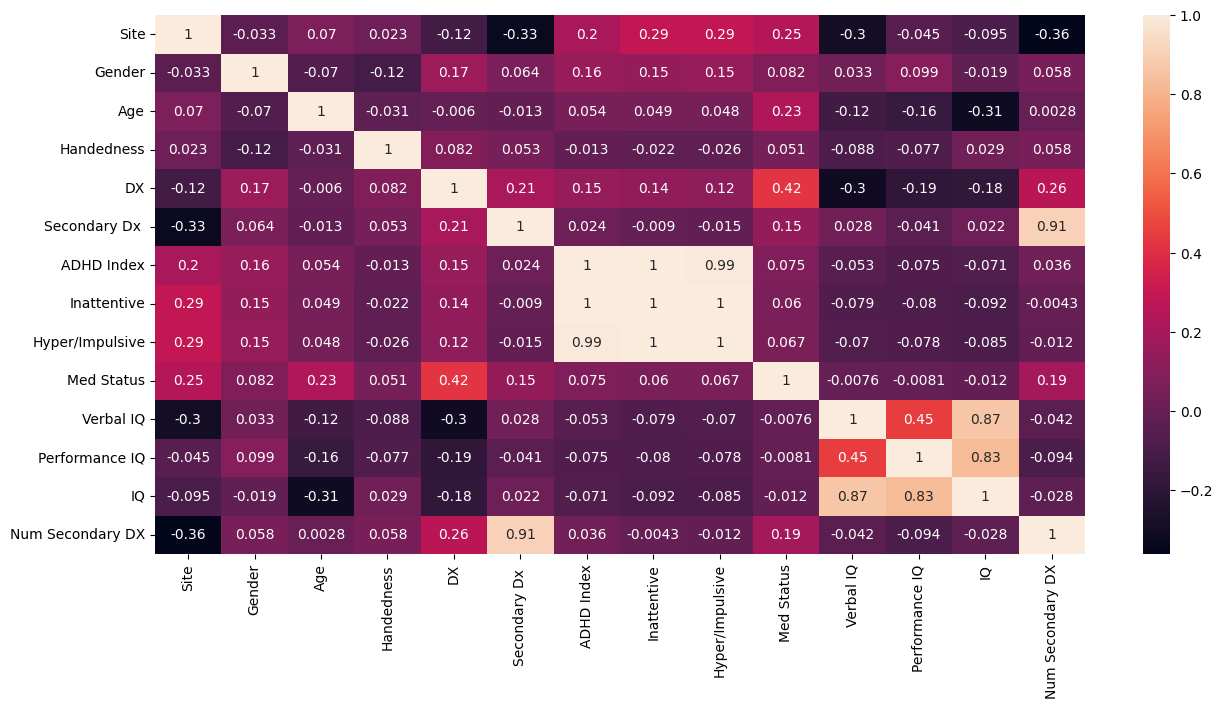

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df_pheno_filtered.corr(), annot=True)

<Axes: >

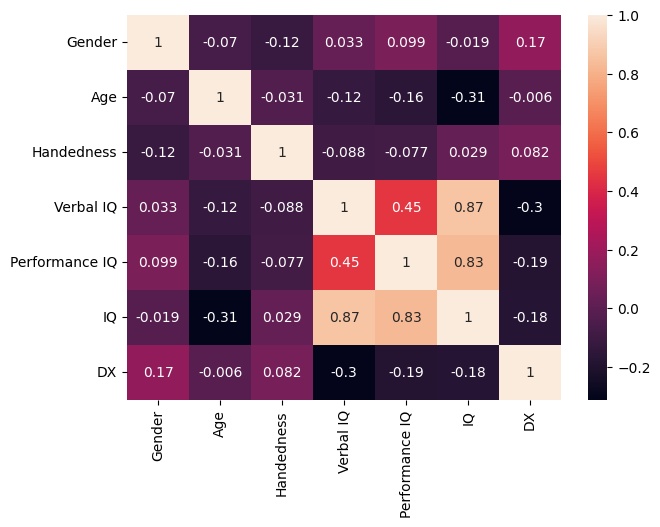

In [20]:
features = ['Gender', 'Age', 'Handedness', 'Verbal IQ', 'Performance IQ', 'IQ', 'DX']

plt.figure(figsize=(7,5))
sns.heatmap(df_pheno_filtered[features].corr(), annot=True)

In [ ]:
df_pheno_filtered['Gender'].value_counts()

In [ ]:
df_pheno_filtered.groupby('DX')['Gender'].median()

In [ ]:
df_pheno_filtered.groupby('Site')['Gender'].median()